Lab 14: Artificial Neural Networks 

Kobie Williams 

4/12/2022 

The purpose of this lab is to experiment with artificial neural networks for classification. 

In [95]:
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier

In [96]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=15OZ7JhQaX2SEqqQAUbyller5PThdmC7M')

In [97]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,102.393791,-6.669607,4.139702,-506.777860,5001.020749,-1.073970,-2.550183,0.363348,1.787044,-0.070631,1.0
1,102.226595,-0.983775,5.996475,648.288942,4999.978850,0.988241,0.025666,1.318736,1.586718,-0.102418,0.0
2,101.035779,10.449141,10.245834,196.562477,4999.717040,-0.363915,-0.388911,-0.332252,1.693191,1.384075,1.0
3,97.059522,7.075832,8.621515,610.339461,4996.834356,-1.404712,0.341290,2.462631,0.011489,-0.229269,1.0
4,99.115294,-47.498000,9.093882,715.756109,4999.408722,2.058694,-1.583398,1.947976,-4.709636,0.579274,1.0


In [98]:
y = df['10']
y

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    1.0
4999    0.0
Name: 10, Length: 5000, dtype: float64

In [99]:
X = df[['0','1','2','3','4','5','6','7','8','9']]

In [100]:
from sklearn.model_selection import train_test_split 

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=25) 

In [101]:
#Make a copy of the data for normalization 
Xtrain_norm = Xtrain.copy() 
Xtrain_mean = Xtrain.mean().copy() 
Xtrain_std = Xtrain.std().copy() 


#z-score normalization
#Xtrain_norm will change after every time 
Xtrain_norm = (Xtrain_norm - Xtrain_mean) / Xtrain_std 

Xtest_norm = (Xtest - Xtrain_mean) / Xtrain_std 
print(Xtrain_norm.mean())
print(Xtrain_norm.std()) 

0   -4.991901e-14
1   -3.419487e-17
2    4.447415e-16
3   -1.170619e-15
4   -1.157794e-11
5    5.669909e-16
6   -2.262079e-18
7    3.648193e-16
8    1.101202e-17
9   -1.873501e-19
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64


In [102]:
mlp = MLPClassifier(hidden_layer_sizes=(4))  


In [103]:
mlp.fit(Xtrain_norm, ytrain) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=4)

In [104]:
y_pred = mlp.predict(Xtest_norm) 

In [105]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       484
         1.0       0.78      0.82      0.80       516

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



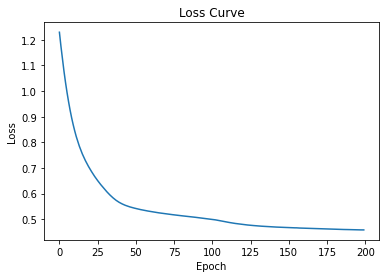

In [106]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Loss Curve') 
plt.show() 


In [107]:
y_pred = mlp.predict(Xtrain_norm)
print(classification_report(ytrain, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      2010
         1.0       0.79      0.80      0.79      1990

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000



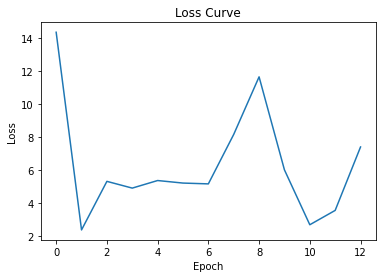

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      2010
         1.0       0.00      0.00      0.00      1990

    accuracy                           0.50      4000
   macro avg       0.25      0.50      0.33      4000
weighted avg       0.25      0.50      0.34      4000

              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65       484
         1.0       0.00      0.00      0.00       516

    accuracy                           0.48      1000
   macro avg       0.24      0.50      0.33      1000
weighted avg       0.23      0.48      0.32      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [111]:
mlp = MLPClassifier(hidden_layer_sizes=(4), learning_rate_init=100)
mlp.fit(Xtrain_norm, ytrain)
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Loss Curve') 
plt.show() 
y_pred = mlp.predict(Xtrain_norm)
print(classification_report(ytrain, y_pred))
y_pred = mlp.predict(Xtest_norm)
print(classification_report(ytest, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


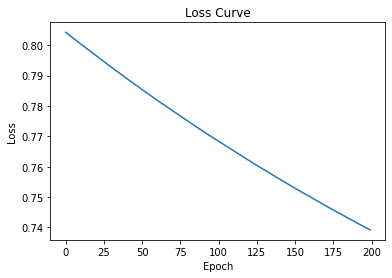

              precision    recall  f1-score   support

         0.0       0.65      0.25      0.37      2010
         1.0       0.53      0.86      0.66      1990

    accuracy                           0.56      4000
   macro avg       0.59      0.56      0.51      4000
weighted avg       0.59      0.56      0.51      4000

              precision    recall  f1-score   support

         0.0       0.63      0.24      0.35       484
         1.0       0.55      0.87      0.67       516

    accuracy                           0.56      1000
   macro avg       0.59      0.56      0.51      1000
weighted avg       0.59      0.56      0.52      1000



In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(4), learning_rate_init=0.00001)
mlp.fit(Xtrain_norm, ytrain)
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Loss Curve') 
plt.show() 
y_pred = mlp.predict(Xtrain_norm)
print(classification_report(ytrain, y_pred))
y_pred = mlp.predict(Xtest_norm)
print(classification_report(ytest, y_pred))

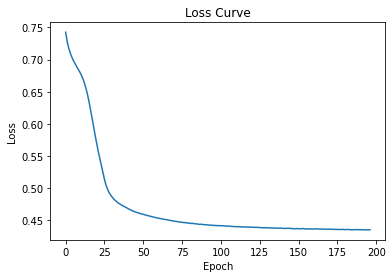

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      2010
         1.0       0.80      0.82      0.81      1990

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78       484
         1.0       0.79      0.81      0.80       516

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [113]:
mlp = MLPClassifier(hidden_layer_sizes=(4,8), learning_rate_init=0.001)
mlp.fit(Xtrain_norm, ytrain)
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Loss Curve') 
plt.show() 
y_pred = mlp.predict(Xtrain_norm)
print(classification_report(ytrain, y_pred))
y_pred = mlp.predict(Xtest_norm)
print(classification_report(ytest, y_pred))

Test 1) When the learning rate is too high, it makes the loss curve not optimized. 

Test 2) When the learning rate is too low, we don't see enough change in the loss curve per the change in epochs. 

Test 3) When there are more layers it made the loss curve more optimal but not as optimal that we'd like it to be. 

Overall, with more layers it adds to training time, but when you decrease the learning rate the training time goes down. 